### 구매 후기를 이용한 토픽모델링

- 데이터 : https://drive.google.com/file/d/1eeTHELYDR0UW9CK7yODGhcUGylTfpLv4/view?usp=sharing

In [62]:
import pandas as pd

review = pd.read_csv("centrum_review.txt", header=None)
review

,0
0,일반 약국에서 사는것보다 저렴해서 좋아요~매일 먹는 약이니 신중하게 선택해야겠죠~부...
1,배송빠르고 물건 정확하게 잘왔어요
2,2번째구매했는데 매우 만족합니다.
3,싸기도하고 좋고 늘사먹습??ㄱㆍ
4,적극추천합니다.배송도빨라요.
...,...
95,잘 받았어요
96,좋아요 ㄹㄹ
97,감사합니다.
98,만족합니다~


In [63]:
from konlpy.tag import Okt
okt = Okt()

In [64]:
docs=[]

for i in review[0]:
    docs.append(okt.nouns(i))

In [65]:
docs

[['일반', '약국', '매일', '약', '선택', '부부', '매일', '기운'],
 ['배송', '물건'],
 ['번', '구매', '매우'],
 ['기도', '늘', '습'],
 ['적극', '추천', '배송'],
 [],
 ['부모님', '선물', '온라인', '최저', '가로', '사서'],
 ['배송', '요즘', '책', '비타민', '생각', '기분', '탓', '덜', '다음', '이용'],
 ['정말', '저', '보오', '구매', '평', '워낙', '증명', '제약회사', '제품'],
 ['플라스틱', '포장', '살짝', '과대', '포장', '상품', '자체', '투명', '플라스틱', '포장'],
 ['부모님', '사', '얼마', '효과', '또'],
 ['건강', '위해', '구매', '센트', '룸', '포맨', '군대', '아들', '해', '가격'],
 [],
 ['며칠', '복용', '아침', '좀', '덜'],
 ['배송', '영양소', '다른', '비타민'],
 ['상품'],
 ['두번째', '구매', '양도', '배송'],
 ['배송'],
 ['침'],
 ['아주'],
 [],
 ['잘바아를러', '이'],
 [],
 ['항상'],
 ['배송', '감사'],
 ['매우'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['배송'],
 ['아주'],
 [],
 ['구매', '호호', '호', '후후후', '히히히', '헤헤', '헤흐흐흐햐햐햐헤', '허후', '호'],
 ['비타민', '아연', '하루', '섭취', '기준', '영양소', '소변', '배출', '요', '노란색', '용'],
 [],
 ['비타민', '또', '학창시절', '봘', '홓', '화이팅'],
 ['배송'],
 ['구매', '맨'],
 ['배송', '남편', '햏', '효과', '좀더'],
 ['그'],
 ['남편', '매일', '민', '양도', '또', '배송', '좀', '느렷어'],
 ['항상', '포장'],
 ['센트

In [29]:
review.loc[5]

0    너무좋습니다
Name: 5, dtype: object

In [30]:
def get_nouns(text):
    nouns=okt.nouns(text)
    nouns=[word for word in nouns if len(word)>1]
    return nouns

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(tokenizer=get_nouns)

tdm= cv.fit_transform(review[0])

In [32]:
cv.get_feature_names()[:10]

['가격', '가로', '감사', '건강', '고등학생', '과대', '구라', '구매', '군대', '기도']

In [33]:
cv.vocabulary_

{'일반': 79,
 '약국': 66,
 '매일': 28,
 '선택': 51,
 '부부': 41,
 '기운': 11,
 '배송': 33,
 '물건': 32,
 '구매': 7,
 '매우': 27,
 '기도': 9,
 '적극': 82,
 '추천': 94,
 '부모님': 40,
 '선물': 50,
 '온라인': 72,
 '최저': 93,
 '가로': 1,
 '사서': 45,
 '요즘': 73,
 '비타민': 43,
 '생각': 49,
 '기분': 10,
 '다음': 20,
 '이용': 77,
 '정말': 84,
 '보오': 37,
 '워낙': 75,
 '증명': 91,
 '제약회사': 85,
 '제품': 86,
 '플라스틱': 101,
 '포장': 100,
 '살짝': 47,
 '과대': 5,
 '상품': 48,
 '자체': 80,
 '투명': 97,
 '얼마': 69,
 '효과': 112,
 '건강': 3,
 '위해': 76,
 '센트': 54,
 '포맨': 99,
 '군대': 8,
 '아들': 61,
 '가격': 0,
 '며칠': 31,
 '복용': 39,
 '아침': 65,
 '영양소': 71,
 '다른': 18,
 '두번째': 25,
 '양도': 67,
 '아주': 64,
 '잘바아를러': 81,
 '항상': 106,
 '감사': 2,
 '호호': 110,
 '후후후': 113,
 '히히히': 114,
 '헤헤': 108,
 '헤흐흐흐햐햐햐헤': 109,
 '허후': 107,
 '아연': 63,
 '하루': 103,
 '섭취': 52,
 '기준': 12,
 '소변': 56,
 '배출': 34,
 '노란색': 15,
 '학창시절': 104,
 '화이팅': 111,
 '남편': 14,
 '좀더': 88,
 '느렷어': 17,
 '센트룸': 55,
 '하니': 102,
 '용량': 74,
 '처음': 92,
 '보지': 38,
 '사업': 46,
 '번창': 35,
 '멀티': 30,
 '주문': 90,
 '한지': 105,
 '어제': 68,
 '먹기': 29,

In [34]:
doc=tdm[0].toarray()
doc

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0]], dtype=int64)

In [35]:
count=tdm.sum(axis=0)
count

matrix([[ 4,  1,  2,  1,  1,  1,  1,  8,  1,  1,  2,  1,  1,  1,  2,  1,
          1,  1,  1,  1,  3,  1,  1,  1,  1,  2,  1,  2,  3,  1,  1,  1,
          1, 22,  1,  2,  1,  1,  1,  2,  2,  1,  1,  7,  1,  1,  1,  1,
          2,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  2,  2,  1,
          3,  1,  1,  2,  1,  1,  1,  2,  1,  1,  1,  1,  1,  2,  1,  1,
          1,  1,  3,  1,  1,  1,  3,  1,  1,  1,  2,  1,  1,  1,  5,  2,
          1,  1,  1,  1,  6,  2,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,
          3,  1,  1]], dtype=int64)

In [36]:
word_count=pd.DataFrame({"단어": cv.get_feature_names(),
                        "빈도": count.flat})
word_count.head()

,단어,빈도
0,가격,4
1,가로,1
2,감사,2
3,건강,1
4,고등학생,1


In [37]:
word_count.sort_values(by="빈도", ascending=False)

,단어,빈도
33,배송,22
7,구매,8
43,비타민,7
100,포장,6
94,추천,5
...,...,...
41,부부,1
38,보지,1
37,보오,1
36,보고,1


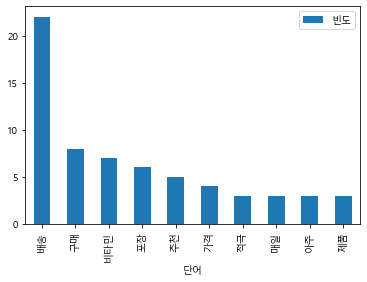

In [43]:
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

word_count_index = word_count.copy()
word_count_index.index=word_count_index["단어"]
word_count_index.sort_values(by="빈도", ascending=False)[:10].plot.bar()
plt.show()

In [44]:
#추출한 명사 리스트를 활용해 명사만으로 이루어진 문서를 생성합니다.
docs_noun = docs.copy()

for i in range(len(docs_noun)):
    docs_noun[i] = ' '.join(docs_noun[i])

    
    docs_noun

['일반 약국 매일 약 선택 부부 매일 기운',
 '배송 물건',
 '번 구매 매우',
 '기도 늘 습',
 '적극 추천 배송',
 '',
 '부모님 선물 온라인 최저 가로 사서',
 '배송 요즘 책 비타민 생각 기분 탓 덜 다음 이용',
 '정말 저 보오 구매 평 워낙 증명 제약회사 제품',
 '플라스틱 포장 살짝 과대 포장 상품 자체 투명 플라스틱 포장',
 '부모님 사 얼마 효과 또',
 '건강 위해 구매 센트 룸 포맨 군대 아들 해 가격',
 '',
 '며칠 복용 아침 좀 덜',
 '배송 영양소 다른 비타민',
 '상품',
 '두번째 구매 양도 배송',
 '배송',
 '침',
 '아주',
 '',
 '잘바아를러 이',
 '',
 '항상',
 '배송 감사',
 '매우',
 '',
 '',
 '',
 '',
 '',
 '',
 '배송',
 '아주',
 '',
 '구매 호호 호 후후후 히히히 헤헤 헤흐흐흐햐햐햐헤 허후 호',
 '비타민 아연 하루 섭취 기준 영양소 소변 배출 요 노란색 용',
 '',
 '비타민 또 학창시절 봘 홓 화이팅',
 '배송',
 '구매 맨',
 '배송 남편 햏 효과 좀더',
 '그',
 '남편 매일 민 양도 또 배송 좀 느렷어',
 '항상 포장',
 '센트룸 하니',
 '용량 가격 비타민 추천',
 '비타민 처음 추천',
 '보지',
 '아주 다음 꼭 이 적극 추천 사업 번창 다음 멀티 비타민',
 '배송 포장',
 '배송',
 '주문 한지',
 '어제 먹기 시작 나중 다시 주문 때 이용 수고',
 '배송 빨',
 '번창',
 '배송',
 '배송 감사',
 '자',
 '짐 구라',
 '',
 '항상 제품',
 '아빠 일단 배송 빨 용 뾱뾱이없 비닐 포장 달랑 조금 당황 염',
 '',
 '가격 대비',
 '몸',
 '',
 '복용',
 '평소 센트룸 달 가격 구매 종종',
 '신 것',
 '고등학생 아들 아빠 칼슘 성분 좀 칼슘 일 활 기분 탓',
 '',
 '배송',
 '배송',
 '도착',
 '보고 또',
 '신랑',
 '배송'

In [46]:
noun_doc = ' '.join(docs_noun)
noun_doc = noun_doc.strip()
noun_doc

'일반 약국 매일 약 선택 부부 매일 기운 배송 물건 번 구매 매우 기도 늘 습 적극 추천 배송  부모님 선물 온라인 최저 가로 사서 배송 요즘 책 비타민 생각 기분 탓 덜 다음 이용 정말 저 보오 구매 평 워낙 증명 제약회사 제품 플라스틱 포장 살짝 과대 포장 상품 자체 투명 플라스틱 포장 부모님 사 얼마 효과 또 건강 위해 구매 센트 룸 포맨 군대 아들 해 가격  며칠 복용 아침 좀 덜 배송 영양소 다른 비타민 상품 두번째 구매 양도 배송 배송 침 아주  잘바아를러 이  항상 배송 감사 매우       배송 아주  구매 호호 호 후후후 히히히 헤헤 헤흐흐흐햐햐햐헤 허후 호 비타민 아연 하루 섭취 기준 영양소 소변 배출 요 노란색 용  비타민 또 학창시절 봘 홓 화이팅 배송 구매 맨 배송 남편 햏 효과 좀더 그 남편 매일 민 양도 또 배송 좀 느렷어 항상 포장 센트룸 하니 용량 가격 비타민 추천 비타민 처음 추천 보지 아주 다음 꼭 이 적극 추천 사업 번창 다음 멀티 비타민 배송 포장 배송 주문 한지 어제 먹기 시작 나중 다시 주문 때 이용 수고 배송 빨 번창 배송 배송 감사 자 짐 구라  항상 제품 아빠 일단 배송 빨 용 뾱뾱이없 비닐 포장 달랑 조금 당황 염  가격 대비 몸  복용 평소 센트룸 달 가격 구매 종종 신 것 고등학생 아들 아빠 칼슘 성분 좀 칼슘 일 활 기분 탓  배송 배송 도착 보고 또 신랑 배송 배송 적극 추천 숩니  여여퍄패패커  두번째 구매 은 효과 점점 컨디션 거  배송  선물 만족 노어 챂        일반 약국 매일 약 선택 부부 매일 기운 배송 물건 번 구매 매우 기도 늘 습 적극 추천 배송  부모님 선물 온라인 최저 가로 사서 배송 요즘 책 비타민 생각 기분 탓 덜 다음 이용 정말 저 보오 구매 평 워낙 증명 제약회사 제품 플라스틱 포장 살짝 과대 포장 상품 자체 투명 플라스틱 포장 부모님 사 얼마 효과 또 건강 위해 구매 센트 룸 포맨 군대 아들 해 가격  며칠 복용 아침 좀 덜 배송 영양소 다른 비타민 상품 두번째 구매 양

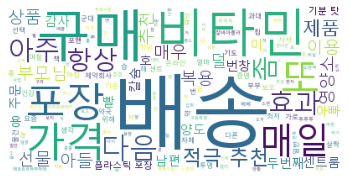

In [48]:
#워드클라우드
from wordcloud import WordCloud

font_path = "C:/Windows/Fonts/malgun.ttf"

'''from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
re('font', family=font)'''

wc = WordCloud(font_path=font_path, background_color="white")
wc.generate(noun_doc)

plt.figure()
plt.imshow(wc)
plt.axis("off")
plt.show()

In [49]:
docs

[['일반', '약국', '매일', '약', '선택', '부부', '매일', '기운'],
 ['배송', '물건'],
 ['번', '구매', '매우'],
 ['기도', '늘', '습'],
 ['적극', '추천', '배송'],
 [],
 ['부모님', '선물', '온라인', '최저', '가로', '사서'],
 ['배송', '요즘', '책', '비타민', '생각', '기분', '탓', '덜', '다음', '이용'],
 ['정말', '저', '보오', '구매', '평', '워낙', '증명', '제약회사', '제품'],
 ['플라스틱', '포장', '살짝', '과대', '포장', '상품', '자체', '투명', '플라스틱', '포장'],
 ['부모님', '사', '얼마', '효과', '또'],
 ['건강', '위해', '구매', '센트', '룸', '포맨', '군대', '아들', '해', '가격'],
 [],
 ['며칠', '복용', '아침', '좀', '덜'],
 ['배송', '영양소', '다른', '비타민'],
 ['상품'],
 ['두번째', '구매', '양도', '배송'],
 ['배송'],
 ['침'],
 ['아주'],
 [],
 ['잘바아를러', '이'],
 [],
 ['항상'],
 ['배송', '감사'],
 ['매우'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['배송'],
 ['아주'],
 [],
 ['구매', '호호', '호', '후후후', '히히히', '헤헤', '헤흐흐흐햐햐햐헤', '허후', '호'],
 ['비타민', '아연', '하루', '섭취', '기준', '영양소', '소변', '배출', '요', '노란색', '용'],
 [],
 ['비타민', '또', '학창시절', '봘', '홓', '화이팅'],
 ['배송'],
 ['구매', '맨'],
 ['배송', '남편', '햏', '효과', '좀더'],
 ['그'],
 ['남편', '매일', '민', '양도', '또', '배송', '좀', '느렷어'],
 ['항상', '포장'],
 ['센트

In [53]:
import gensim
from gensim import corpora, models

resultList = []
keyword = 5

texts=[]
for line in docs:
    tokens = [word for word in line if len(word) > 1]
    texts.append(tokens)
    
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

ldamodel = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=5)

for num in range(5):
    resultList.append(ldamodel.show_topic(num, keyword))

In [54]:
resultList

[[('배송', 0.2299779),
  ('매일', 0.046140358),
  ('남편', 0.03169649),
  ('효과', 0.031629015),
  ('감사', 0.03146854)],
 [('아주', 0.055107314),
  ('다음', 0.0384658),
  ('아빠', 0.038452677),
  ('칼슘', 0.038441338),
  ('배송', 0.022238785)],
 [('포장', 0.057418477),
  ('비타민', 0.053260688),
  ('배송', 0.044715237),
  ('추천', 0.043553747),
  ('플라스틱', 0.030101206)],
 [('구매', 0.10405111),
  ('비타민', 0.036352616),
  ('배송', 0.033030257),
  ('가격', 0.031989157),
  ('두번째', 0.03178103)],
 [('가격', 0.05313012),
  ('복용', 0.052760776),
  ('구매', 0.02936616),
  ('아들', 0.0291016),
  ('건강', 0.029097904)]]

In [55]:
ldamodel.print_topics(num_words=5)

[(0, '0.230*"배송" + 0.046*"매일" + 0.032*"남편" + 0.032*"효과" + 0.031*"감사"'),
 (1, '0.055*"아주" + 0.038*"다음" + 0.038*"아빠" + 0.038*"칼슘" + 0.022*"배송"'),
 (2, '0.057*"포장" + 0.053*"비타민" + 0.045*"배송" + 0.044*"추천" + 0.030*"플라스틱"'),
 (3, '0.104*"구매" + 0.036*"비타민" + 0.033*"배송" + 0.032*"가격" + 0.032*"두번째"'),
 (4, '0.053*"가격" + 0.053*"복용" + 0.029*"구매" + 0.029*"아들" + 0.029*"건강"')]

In [58]:
ldamodel.get_document_topics(corpus)[0]

[(0, 0.8999815),
 (1, 0.025004629),
 (2, 0.025003653),
 (3, 0.025003863),
 (4, 0.02500638)]